<a href="https://colab.research.google.com/github/StephenMa1511/Risk-Management/blob/main/Risk_Management_GWP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Training, Validation, and Testing Datasets
### General ideas:

Machine learning prediction is based on the basis of identifying patterns from data feed, a process that is defined as training. To achieve this, a training dataset, which serves as the foundation for training the model, is required. Moreover, machine learning methods also represent possibility to overfit when trained on a limited dataset for a long training period. Technically, overfitting occurs when the model not only learns the equivalent underlying patterns but also the irrelevant noise in the data, as they start memorizing the dataset rather than completing the generalization (Goodfellow, Bengio, & Courville, 2016).

Moreover, machine learning algorithms are characterized by trainable parameters and hyperparameters. In the former, parameters are technically adjusted during the training process to minimize the error between the predicted and actual values. Meanwhile, hyperparameters describe the general structure of the models and influence the overall performance (Bengio, 2012); which include metrics in fields such as the learning rate, the number of layers in a neural network, and the activation function types.

Next, to deal with the issues of model overfitting and hyperparameter tuning, a validation set is employed to validate the model's performance and help to optimize the hyperparameters (Hastie, Tibshirani, & Friedman, 2009).

Finally, to evaluate the model's performance comprehensively, a test set is utilized. One basic requirement is that the test dataset must be independent of both the training and validation sets. The performance metrics obtained from the test set provide an unbiased estimate of the model's performance (accuracy), and more importantly, its generalization capability (Murphy, 2012).

In short, the training set, the validation set, and the test set, play significantly important roles in machine learning, as they help to ensuring the development of robust, well-generalized models.

### Training Datasets:

The majority of the data available is usually made up of the training set, typically around 70-80% of the entire dataset. This collection is incorporated into the development of the machine learning model. Every piece of data in the training set includes a feature and a label. The input feature can range from unprocessed data like an image or asset price, to typically preprocessed data. Preprocessing, also called feature engineering, consists of converting raw data into a standardized format or creating technical features from the data to increase accuracy and improve training stability (Domingos, 2012).

The target variable that the model seeks to predict may differ in characteristics based on the model's goal. It can be continuous, representing numerical values, categorical, representing distinct classes, or ordinal, representing ranked categories. Throughout the learning process, the model adapts its parameters using optimization algorithms to recognize patterns and relationships within the data (Bishop, 2006).

During the training process, different algorithms are used to improve the model. The most common training algorithms include gradient descent techniques like stochastic gradient descent, batch gradient descent, and their improved forms like Nesterov momentum, RMSProp, AdaGrad, and Adam. These algorithms continuously adjust the model's parameters to reduce the discrepancy between predicted and real values (Kingma & Ba, 2015). Moreover, in specific situations, optimization is carried out using gradient-free techniques such as evolutionary algorithms, simulated annealing, and swarm intelligence (Eiben & Smith, 2015).

The main goal of the training is to reduce the difference between the model's predictions and the true target labels in order to accurately represent the data's underlying structure. This is accomplished by employing different loss functions that measure the discrepancies. Some typical loss functions are Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Cross-Entropy, precision, and recall (Murphy, 2012).

### Validation Datasets:

The validation set usually makes up around 10-20% of the whole dataset and is clearly distinguished from the training set. The main purpose is to check for overfitting, helping researchers choose data augmentation and decide when to stop training, thus preventing the model from picking up the noise in the training data, a method called early stopping.

Another important function of the validation set is to help researchers find the best hyperparameters for reaching the highest accuracy possible. Hyperparameters such as those for data augmentation, early stopping, model structure, training methodology, and training parameters all contribute significantly to the model's performance. Instances of hyperparameters may encompass factors such as the rate at which learning occurs, the quantity of data processed in each batch, the number of layers within a neural network, and the specific activation functions utilized (Bengio, 2012).

Ensuring a distinct separation between the validation set and the training set is essential to prevent data leakage, which can result in inaccurate validation outcomes. Data leakage happens when data not in the training set is mistakenly included in creating the model, leading to optimistic performance estimates and a lack of generalization to new data.

Researchers can improve overall performance and accuracy by fine-tuning hyperparameters using the validation set. This procedure includes repetitive testing and adjusting to discover the optimal combination of hyperparameters, ultimately improving the model's performance on unfamiliar data (Hastie, Tibshirani, & Friedman, 2009).

### Testing Datasets:

To avoid data leakage and maintain result accuracy, the test set, which consists of the last 10-20% of the dataset, is strictly isolated from the training and validation sets. Maintaining a strict separation is essential to preserve the performance evaluation's integrity, as any mixing with the training or validation data could result in inaccurate conclusions about the model's effectiveness (Kaufman et al., 2012).

The test set is used as an independent benchmark to evaluate the optimized model's overall performance and generalization abilities after training. It is distinct from the validation set as it is used after training and validation are finished, not during the training process. This guarantees that the performance measures obtained from the test dataset truly represent the model's capacity to adapt to unfamiliar data (Goodfellow, Bengio, & Courville, 2016).

Like the validation set, the test set utilizes different accuracy metrics to offer detailed information on the model's overall performance. These metrics, like accuracy, precision, recall, F1-score, and AUC, provide various viewpoints on the model's predictive abilities (Hastie, Tibshirani, & Friedman, 2009).

The main goal of the test set is to simulate the circumstances of a real production environment in order to accurately predict the model's performance after implementation. By closely replicating the operational environment, the test dataset allows researchers to acquire a valuable understanding of the model's strength and dependability, guaranteeing it fulfills the expected performance criteria prior to deployment (Murphy, 2012).



## STEP 2 to 5

IN this final GWP, we decided to extend the reseach of Alvi (2018) to more recent data. The EIA time series reduce from 15 in the orgiginal paper to 8 in our work due to some data is no longer availabe from the EIA API. As for the time series from fred, the number of indicator is unchanged at 10 variable ( including WTI price).

Our dataset spans from 1993 to 2021 following the proportion of data splitting of 80-10-10 from the paper of Alvi (2018). The dataset is then split into the training set covering from 01/1993 to 08/2015 (80%), the validation set covering from 08/2015 to 08/2016 (10%), and the test set covering from 08/2016 to 04/2021 (10%).



In [ ]:
!pip install -q fredapi pgmpy myeia hmms networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.8/524.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.7 MB/s eta 0:00:00


In [ ]:
# Libraries loading and seeting API Keys:
import fredapi
from fredapi import Fred
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from myeia.api import API
import numpy as np
import hmms
import networkx as nx
import seaborn as sns

# Importing the library
# the API key we recieved from EIA
eia_key = "bCmoeBh5J0DVQ36NFo4ckz8TX25rOrqvBpJYk93G";
# Initiates a session with the EIA datacenter to recieve datasets
eia_api = API(eia_key);

# FRED API key
fred_key = "fd269c89c2141092cee85c0440f5333e";
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);

#### Download data and use hmm package to discretize the data

In [ ]:
# Setting up the cleaning functions:
import datetime # Using the datetime library
def convert_to_datetime(input):
  return datetime.datetime.strptime(input[:9], "%Y %m ").date();

def clean_EIA(data):
  data.replace('-', np.nan, regex=True, inplace=True);
  data.fillna(method='bfill', inplace=True);
  # data.index = data.index.map(convert_to_datetime);
  # data.index = pd.to_datetime(data.index);
  return data

In [ ]:
# Download the indicators:
datasets_eia = [
'STEO.PAPR_NONOPEC.M',
'STEO.PAPR_OPEC.M',
'STEO.PATC_OECD.M',
'STEO.PATC_NON_OECD.M',
'STEO.COPRPUS.M',
'STEO.CORIPUS.M',
'STEO.COPS_OPEC.M',
'STEO.COPC_OPEC.M'
];

datasets_fred = [
'CPIENGSL',
'CAPG211S',
'CAPUTLG211S',
'IPG211S',
'IPG211111CN',
'INDPRO',
'IPN213111N',
'PCU211211',
];

data_merge = []
for series_id in datasets_eia:
  df = pd.DataFrame(eia_api.get_series(series_id=series_id));
  clean_EIA(df);
  df.columns = [series_id];
  data_merge.append(df);

# Adding FRED datasets
for series_id in datasets_fred:
  df = pd.DataFrame(fred.get_series(series_id), columns=[series_id]);
  data_merge.append(df);

/usr/local/lib/python3.10/dist-packages/myeia/api.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df = df.rename(columns={data_identifier: df[col][0]})
/usr/local/lib/python3.10/dist-packages/myeia/api.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df = df[df[col][0]].to_frame()
<ipython-input-3-ba0874f18c5f>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True);
/usr/local/lib/python3.10/dist-packages/myeia/api.py:109: FutureWarning: Series.__getitem__ treating keys as positio

In [ ]:
# Download the oil prices and add the current and forecast dataset
datasets = datasets_eia + datasets_fred + ['WTISPLC', 'forecast'];

current = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC']);
forecast = pd.DataFrame(fred.get_series('WTISPLC').shift(-1),
columns=['forecast']);
data_merge.append(current);
data_merge.append(forecast);

data = pd.concat(data_merge, axis=1, join='inner').sort_index();

filtered_df = data.loc[(data.index >= '1993-01-01') & (data.index <= '2024-08-01')]

data = filtered_df

In [ ]:
# Data Partitioning:
# Training data:
train_data = data[: int(data.shape[0] * 0.80)];
# Validation Data:
val_data = data[int(0.80 * data.shape[0]) : int(0.90 * data.shape[0])];
# Testing data:
test_data = data[int(0.90* data.shape[0]) : int(data.shape[0])];

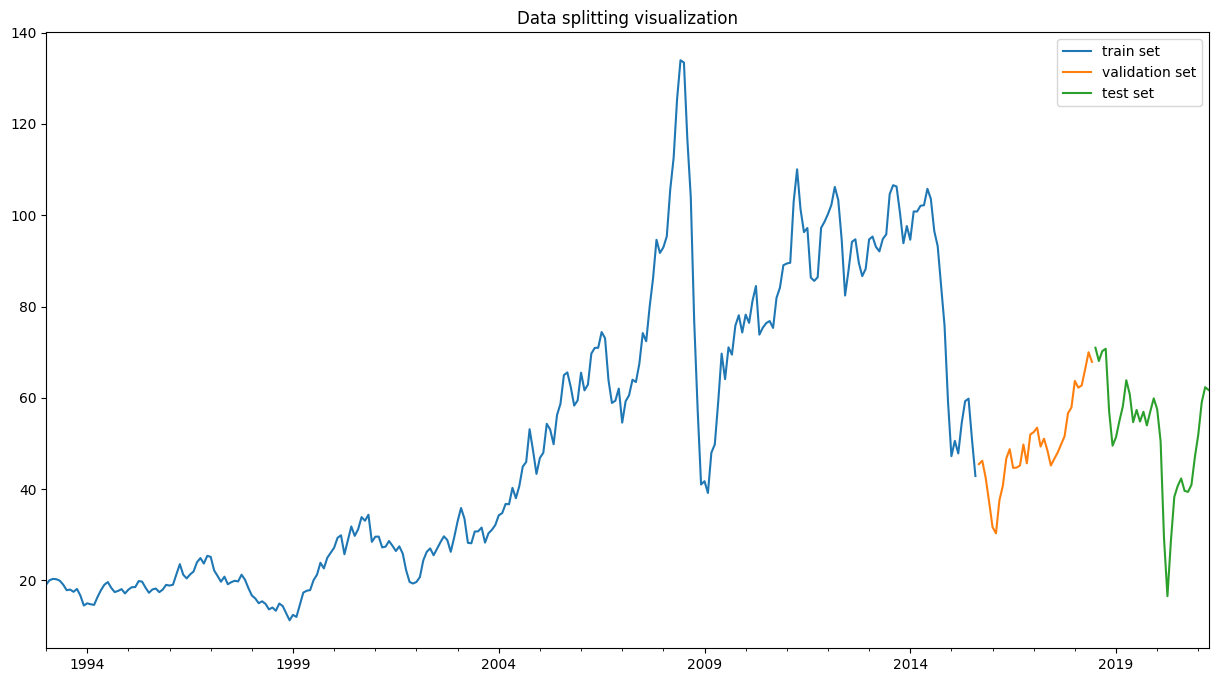

In [ ]:
# Initial Data Visualization:
plt.figure()
ax = train_data['WTISPLC'].plot(figsize = (15,8))
val_data['WTISPLC'].plot(ax=ax)
test_data['WTISPLC'].plot(ax=ax)
plt.legend(['train set', 'validation set', 'test set']);
plt.title('Data splitting visualization')
plt.show();

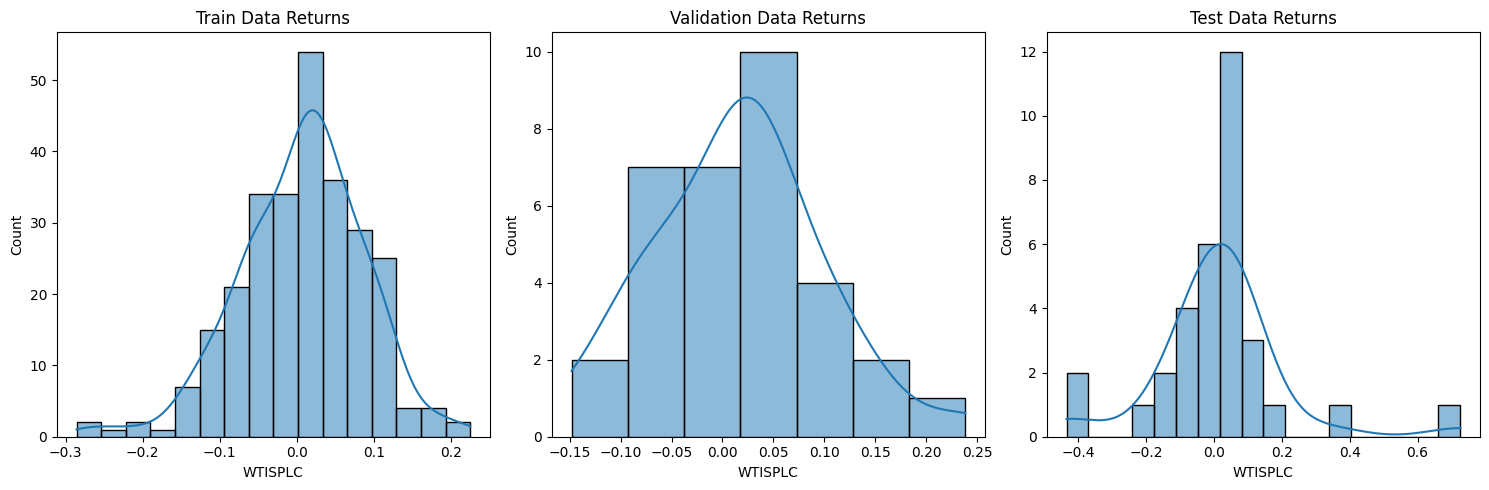

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(train_data['WTISPLC'].pct_change().dropna(), kde=True, ax=axes[0])
axes[0].set_title('Train Data Returns')

sns.histplot(val_data['WTISPLC'].pct_change().dropna(), kde=True, ax=axes[1])
axes[1].set_title('Validation Data Returns')

sns.histplot(test_data['WTISPLC'].pct_change().dropna(), kde=True, ax=axes[2])
axes[2].set_title('Test Data Returns')

plt.tight_layout()
plt.show()


From the histograms of returns between the split datasets, the return in validation and test sets show some degree of rig , such as mean and median Meanwhile, the training set displayed strong left skewness, which can affect the model prediction reliability sin the distribution shape between the train and test set is some what not similar

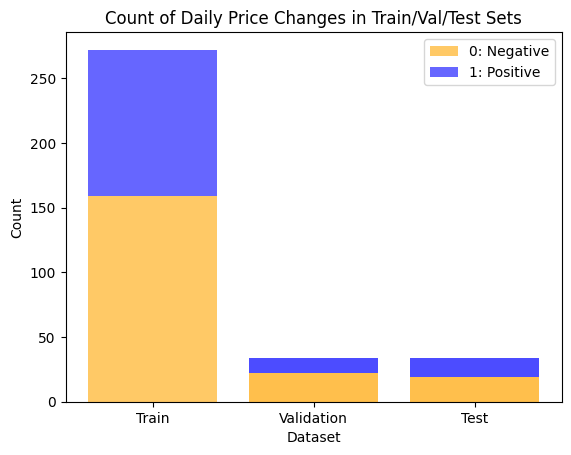

In [ ]:

bin_train_data = train_data['WTISPLC'].diff().apply(lambda x: 1 if x > 0 else 0)
bin_val_data = val_data['WTISPLC'].diff().apply(lambda x: 1 if x > 0 else 0)
bin_test_data = test_data['WTISPLC'].diff().apply(lambda x: 1 if x > 0 else 0)

# Count the occurrences of 0 and 1 in each dataset
train_counts = bin_train_data.value_counts()
val_counts = bin_val_data.value_counts()
test_counts = bin_test_data.value_counts()

# Create a bar plot
fig, ax = plt.subplots()

ax.bar([0], train_counts[1], label='0: Negative', alpha=0.6, color = 'orange')
ax.bar([0], train_counts[0], bottom=train_counts[1], label='1: Positive ', alpha=0.6, color = 'blue')
ax.legend()
ax.bar([1], val_counts[1], label='0: Negative (Val)', alpha=0.7, color = 'orange')
ax.bar([1], val_counts[0], bottom=val_counts[1], label='1: Positive (Val)', alpha=0.7, color = 'blue')

ax.bar([2], test_counts[1], label='0: Negative (Test)', alpha=0.7, color = 'orange')
ax.bar([2], test_counts[0], bottom=test_counts[1], label='1: Positive (Test)', alpha=0.7, color = 'blue')

# Set labels and title
ax.set_xlabel('Dataset')
ax.set_ylabel('Count')
ax.set_title('Count of Daily Price Changes in Train/Val/Test Sets')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Train', 'Validation', 'Test'])


# Display the plot
plt.show()


In [ ]:
# Calculate proportions
train_prop = train_counts / train_counts.sum()
val_prop = val_counts / val_counts.sum()
test_prop = test_counts / test_counts.sum()

# Create a DataFrame
df = pd.DataFrame({
    'Train Count': train_counts,
    'Train Proportion': train_prop,
    'Validation Count': val_counts,
    'Validation Proportion': val_prop,
    'Test Count': test_counts,
    'Test Proportion': test_prop
})

# Set index names
df.index.name = 'Price Change'
df.index = ['Negative', 'Positive']

display(df)


,Train Count,Train Proportion,Validation Count,Validation Proportion,Test Count,Test Proportion
Negative,159,0.584559,22,0.647059,19,0.558824
Positive,113,0.415441,12,0.352941,15,0.441176


From the table and the bar plot below, we could see that the propotion between positive and negative return is more balanced for the train and test set, but it is more negative-leaning for validation set.

### Trained HMM model regimes:

In [ ]:
# Data Discretizing:
price = train_data['WTISPLC'];

# The first value is NaN as there is not a previous month to compare with
price_diff = price.diff()[1:];
# Replacing the change with 1 if positive, else 0
e_seq = np.array(price_diff.apply(lambda x: 1 if x > 0 else 0).values);

# HMM Model Defining:
dhmm_r = hmms.DtHMM.random(3, 2);
e_seq = np.array_split(e_seq, 3);

# HMM Model Training:
dhmm_r.baum_welch(e_seq, 200);
hmms.print_parameters( dhmm_r );

iteration  1 / 200
iteration  2 / 200
iteration  3 / 200
iteration  4 / 200
iteration  5 / 200
iteration  6 / 200
iteration  7 / 200
iteration  8 / 200
iteration  9 / 200
iteration  10 / 200
iteration  11 / 200
iteration  12 / 200
iteration  13 / 200
iteration  14 / 200
iteration  15 / 200
iteration  16 / 200
iteration  17 / 200
iteration  18 / 200
iteration  19 / 200
iteration  20 / 200
iteration  21 / 200
iteration  22 / 200
iteration  23 / 200
iteration  24 / 200
iteration  25 / 200
iteration  26 / 200
iteration  27 / 200
iteration  28 / 200
iteration  29 / 200
iteration  30 / 200
iteration  31 / 200
iteration  32 / 200
iteration  33 / 200
iteration  34 / 200
iteration  35 / 200
iteration  36 / 200
iteration  37 / 200
iteration  38 / 200
iteration  39 / 200
iteration  40 / 200
iteration  41 / 200
iteration  42 / 200
iteration  43 / 200
iteration  44 / 200
iteration  45 / 200
iteration  46 / 200
iteration  47 / 200
iteration  48 / 200
iteration  49 / 200
iteration  50 / 200
iteration

,0
0,4.347803e-43
1,1.000000e+00
2,2.032968e-230


Transition probabilities matrix (A):


,0,1,2
0,0.800808,0.181609,0.017583
1,0.006626,0.469304,0.524070
2,0.518673,0.003601,0.477725


Emission probabilities matrix (B):


,0,1
0,0.352914,0.647086
1,0.000091,0.999909
2,0.948193,0.051807


In [ ]:
np.int = np.int64
( log_prob, s_seq ) = dhmm_r.viterbi(np.concatenate(e_seq).ravel())

In [ ]:
# Data for Plotting Preparing:

# Add price
price_plot = pd.DataFrame(price[1:], index=price[1:].index);
# Add a column representing the regime
price_plot['Regime'] = s_seq;
# Add a column representing the increase or decrease in price
price_plot['diff'] = price_diff;

In [ ]:
### Connect to bull, bear, or stagnating regimes:
# Get means of all assigned states
means = price_plot.groupby(['Regime'])['diff'].mean();
lst_1 = means.index.tolist();
lst_2 = means.sort_values().index.tolist();
map_regimes = dict(zip(lst_2, lst_1));
price_plot['Regime'] = price_plot['Regime'].map(map_regimes);

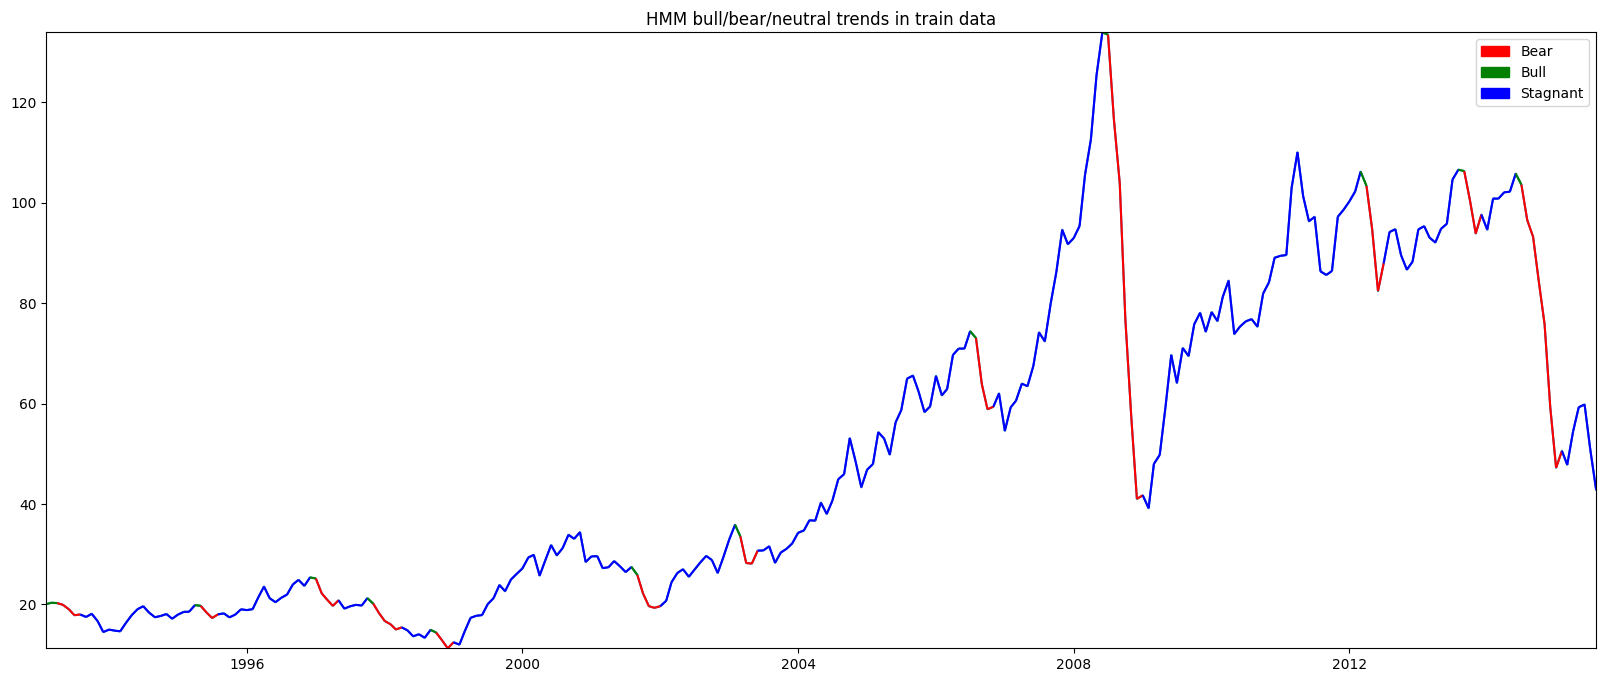

In [ ]:
# Regimes defined by the trained HMM Model:
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import Colormap, ListedColormap, BoundaryNorm
fig, ax = plt.subplots(figsize=(20,8));
ax.plot(price_plot['WTISPLC']);
# Make 0 (Bear) - red, 1 (Stagnant) - blue, 2 (Bull) - green
cmap = ListedColormap(['r','b','g'],'indexed');
norm = BoundaryNorm(range(3 + 1), cmap.N);
inxval = mdates.date2num(price_plot['WTISPLC'].index.to_pydatetime());
points = np.array([inxval, price_plot['WTISPLC']]).T.reshape(-1, 1, 2);
segments = np.concatenate([points[:-1], points[1:]], axis=1);
lc = LineCollection(segments, cmap=cmap, norm=norm);
lc.set_array(price_plot['Regime']);
plt.gca().add_collection(lc);
plt.xlim(price_plot['WTISPLC'].index.min(), price_plot['WTISPLC'].index.max());
plt.ylim(price_plot['WTISPLC'].min(), price_plot['WTISPLC'].max());
r_patch = mpatches.Patch(color='red', label='Bear');
g_patch = mpatches.Patch(color='green', label='Bull');
b_patch = mpatches.Patch(color='blue', label='Stagnant');
plt.legend(handles=[r_patch, g_patch, b_patch]);
plt.title('HMM bull/bear/neutral trends in train data')
plt.show();

We discretize all the variable in train set using hmms libary

In [ ]:
# Discretize the variable in train data
for series_id in datasets:
  if series_id == 'forecast':
    break;
  else:
    dhmm = hmms.DtHMM.random(3,2);
    data_diff = train_data[series_id].diff()[1:];
    emit_seq = np.array_split(data_diff.apply(
    lambda x: 1 if x > 0 else 0).values, 3);
    dhmm.baum_welch(emit_seq, 200);
    path = "./" + series_id.replace(".", "_");
    dhmm.save_params(path);

iteration  1 / 200
iteration  2 / 200
iteration  3 / 200
iteration  4 / 200
iteration  5 / 200
iteration  6 / 200
iteration  7 / 200
iteration  8 / 200
iteration  9 / 200
iteration  10 / 200
iteration  11 / 200
iteration  12 / 200
iteration  13 / 200
iteration  14 / 200
iteration  15 / 200
iteration  16 / 200
iteration  17 / 200
iteration  18 / 200
iteration  19 / 200
iteration  20 / 200
iteration  21 / 200
iteration  22 / 200
iteration  23 / 200
iteration  24 / 200
iteration  25 / 200
iteration  26 / 200
iteration  27 / 200
iteration  28 / 200
iteration  29 / 200
iteration  30 / 200
iteration  31 / 200
iteration  32 / 200
iteration  33 / 200
iteration  34 / 200
iteration  35 / 200
iteration  36 / 200
iteration  37 / 200
iteration  38 / 200
iteration  39 / 200
iteration  40 / 200
iteration  41 / 200
iteration  42 / 200
iteration  43 / 200
iteration  44 / 200
iteration  45 / 200
iteration  46 / 200
iteration  47 / 200
iteration  48 / 200
iteration  49 / 200
iteration  50 / 200
iteration

In [ ]:
# Discretize data by the learned hmm models
disc_test = pd.DataFrame(index = train_data[1:].index);
for series_id in datasets:
  path = "./" + series_id.replace(".", "_") + ".npz";
  if series_id == 'forecast':
    dhmm = hmms.DtHMM.from_file('./WTISPLC.npz');
  else:
    dhmm = hmms.DtHMM.from_file(path);
  data_diff = train_data[series_id].diff()[1:];
  emit_seq = np.array(data_diff.apply(
  lambda x: 1 if x > 0 else 0).values);
  ( log_prob, s_seq ) = dhmm.viterbi(emit_seq);
  disc_test[series_id] = s_seq;

disc_test.to_csv("./train_data.csv"); # Saving to CSV

### BAYESIAN NETWORK TRAINING USING HILL CLIMB SEARCH & PARAMETER OPTIMIZATION

After discretiztion, we would be using pgmpy to learn the structure as well as parmeters for our Belief Network using HillClimbsearch and Bayesian Estimator, this is our initial model without tunning

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.estimators import K2Score, BicScore, BDeuScore, AICScore, BDsScore
from pgmpy.estimators import HillClimbSearch
# from pgmpy.estimators import BayesianEstimator
from pgmpy.models.BayesianNetwork import BayesianNetwork
from pgmpy.models.BayesianNetwork import BayesianNetwork
from pgmpy.estimators import BaseEstimator, MaximumLikelihoodEstimator, ExpectationMaximization, BayesianEstimator

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Retrieve training set
disc_train_data = pd.read_csv("./train_data.csv", index_col=0);

# Structure learning
hc = HillClimbSearch(disc_train_data);
dag_model = hc.estimate(fixed_edges=[
('STEO.PAPR_NONOPEC.M', 'WTISPLC'),
('STEO.PAPR_OPEC.M', 'WTISPLC'),
('STEO.PATC_OECD.M', 'WTISPLC'),
('STEO.PATC_NON_OECD.M', 'WTISPLC')], scoring_method=BDeuScore(disc_train_data)); # Performs local hill climb search

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
# Parameter Learning:
model = BayesianNetwork(dag_model)
model.fit(disc_train_data, state_names=dict(map(lambda e: (e, [0, 1, 2]), datasets)),estimator=BayesianEstimator, prior_type="K2");

To prevent the case of Hillclimbsearch algorithm only converge to a local minima, we re-ran the Hillclimbsearch() 20 times

In [ ]:
def Plot_DAG(model):
    G=nx.Graph();
    G.add_edges_from(model.edges());
    G.add_nodes_from(model.nodes())
    pos = nx.spring_layout(G, k= 1)  # Increase k for node spacing
    nx.draw(model, pos, with_labels=True, arrowsize=20, node_size=800,  # Increase arrowsize
            font_size=10, font_color='black', node_color='lightblue',
            edge_color='gray')
    plt.show()



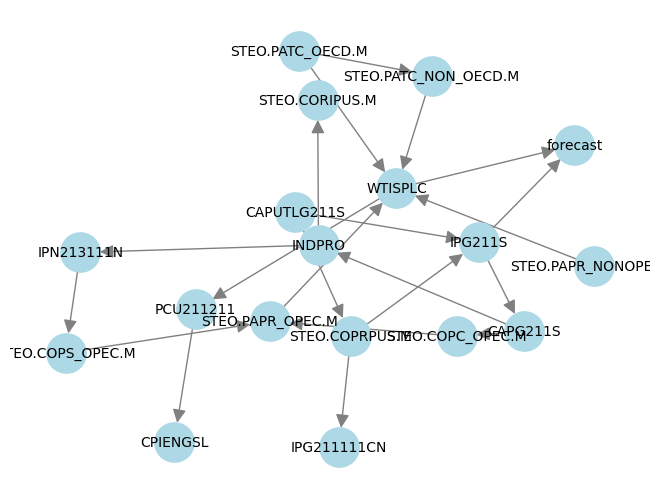

In [ ]:
Plot_DAG(model)

It comes to our amazement that, from the resulting DAG above, the 'forecast' node has only one parent node which is the WTI price itself, it indicates our initial DAG point out that the forecast price of WTI is independant of other indicator given the current WTI price. This phenomenon is inline with our finding from the GWP2 that the WTI oil price time series exhibit statistical significant autocorrelation at lag = 1. This is illustrated by the ACF and PACF plot below

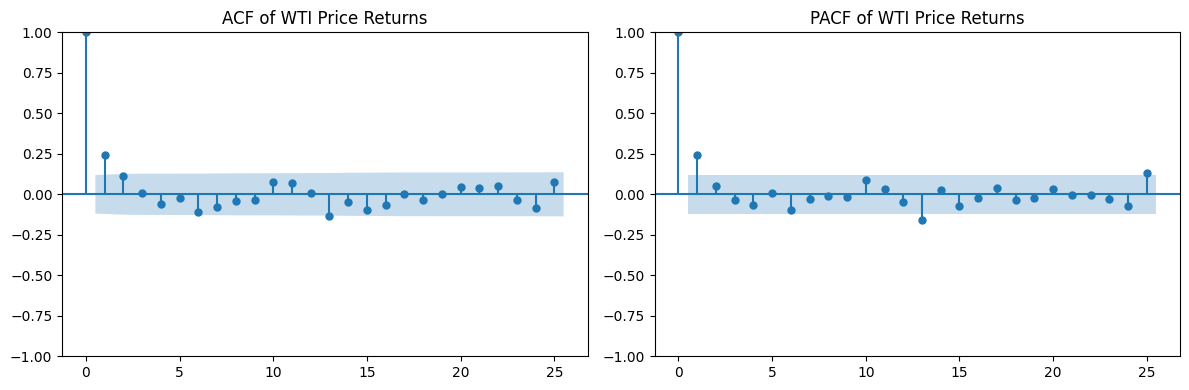

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate returns
wti_ret = train_data['WTISPLC'].pct_change().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(wti_ret, ax=axes[0])
axes[0].set_title('ACF of WTI Price Returns')

plot_pacf(wti_ret, ax=axes[1])
axes[1].set_title('PACF of WTI Price Returns')

plt.tight_layout()
plt.show()


### Validation and Model Tunning

In this section we'll be using the validation data set to validate and fine tune our Bayesian Network

Fistable, we will validate the perfomance of our inital model in the valiation set

In [ ]:
# DIscretizing the validation dataset:
discrete_val = pd.DataFrame(index = val_data[1:].index);
for series_id in datasets:
  path = "./" + series_id.replace(".", "_") + ".npz";
  if series_id == 'forecast':
    dhmm = hmms.DtHMM.from_file('./WTISPLC.npz');
  else:
    dhmm = hmms.DtHMM.from_file(path);
  data_diff = val_data[series_id].diff()[1:];
  emit_seq = np.array(data_diff.apply(lambda x: 1 if x > 0 else 0).values);
  ( log_prob, s_seq ) = dhmm.viterbi(emit_seq);
  discrete_val[series_id] = s_seq;
discrete_val.to_csv("./val_data.csv");

In [ ]:
# Using Validation dataset for Prediction:
discrete_val = pd.read_csv("./val_data.csv", index_col=0);
# Record real data observation, to be compared with the predicted one
val_real = discrete_val['forecast'].to_numpy();
# Drop the real data observation so that it does not bias prediction
val_data_new = discrete_val.drop('forecast', axis=1);
# Inference on the constructed graphical model
val_prediction = model.predict(val_data_new);
val_prediction.index = val_data_new.index
# Retrieve it as an array so we can compare with real value
pred_val = val_prediction['forecast'].to_numpy();

print("\nPredicted Value Validation: ");
print(pred_val);
print("\nReal Value Validation: ");
print(val_real);

error = np.mean(val_real !=  pred_val);
#error = np.mean(vald_real != pred_value_vald);
print("\nError: ");
print(f"{round(error * 100,2)}%");
print("\nAccuracy: ");
print(f"{round((1-error) * 100,2)}%");


  0%|          | 0/33 [00:00<?, ?it/s]


Predicted Value Validation: 
[0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0]

Real Value Validation: 
[2 0 0 0 1 1 1 2 0 1 1 2 0 1 1 1 1 2 0 0 1 1 1 1 1 1 2 0 1 1 2 0 1]

Error: 
36.36%

Accuracy: 
63.64%


In our validation test, our initial model generate 36.6 % error rate compared to 66.67% error rate of a random guess method (since there is 3 state). In other words, our model is 90 % more efficient than a randomguess method (63.64% hit rate vs 33% random hit rate)


Next we will run a grid search over scoring_methods parameters and fixed_edges to see which model yield the best result in our validation set

In [ ]:
def Hc_tunning(train_data, scoring_methods, iteration = 10):
    best_model = None
    best_error = float('inf')
    for iter in range(iteration):
        for i in range(2):
          if i == 0:
            for sc in scoring_methods:
              hc = HillClimbSearch(train_data);
              dag_model = hc.estimate(fixed_edges=[
              ('STEO.PAPR_NONOPEC.M', 'WTISPLC'), # Fixed edges from the paper
              ('STEO.PAPR_OPEC.M', 'WTISPLC'),
              ('STEO.PATC_OECD.M', 'WTISPLC'),
              ('STEO.PATC_NON_OECD.M', 'WTISPLC')], scoring_method=sc(train_data))

              model = BayesianNetwork(dag_model)
              model.fit(train_data, state_names=dict(map(lambda e: (e, [0, 1, 2]), datasets)),estimator=BayesianEstimator, prior_type="K2");
              val_prediction = model.predict(val_data_new);
              val_prediction.index = val_data_new.index
              pred_val = val_prediction['forecast'].to_numpy()

              error = np.mean(val_real !=  pred_val)
              if error < best_error:
                best_error = error
                best_model = model

          if i > 0 :  # no fixed edge models
            for sc in scoring_methods:
              hc = HillClimbSearch(train_data);
              dag_model = hc.estimate(scoring_method=sc(train_data))
              model = BayesianNetwork(dag_model)
              model.fit(train_data, state_names=dict(map(lambda e: (e, [0, 1, 2]), datasets)),estimator=BayesianEstimator, prior_type="K2");

              val_prediction = model.predict(val_data_new);
              val_prediction.index = val_data_new.index
              pred_val = val_prediction['forecast'].to_numpy()
              error = np.mean(val_real !=  pred_val)
              if error < best_error:
                best_error = error
                best_model = model

    return best_model, best_error


In [ ]:
scoring_methods = [BicScore, BDeuScore, AICScore, BDsScore]
best_model, best_acc_score = Hc_tunning(disc_train_data, scoring_methods)
print('Grid search best score:')
print(f"{round(best_acc_score * 100,2)}%");

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Grid search best score:
36.36%


The best reslut is still the same as our initial model's score. Thus we'll keeping our initial model structure and parameter and move on to the test set

  0%|          | 0/33 [00:00<?, ?it/s]


Predicted Value Validation: 
[0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0]

Real Value Validation: 
[2 0 0 0 1 1 1 2 0 1 1 2 0 1 1 1 1 2 0 0 1 1 1 1 1 1 2 0 1 1 2 0 1]

Error: 
36.36%

Accuracy: 
63.64%


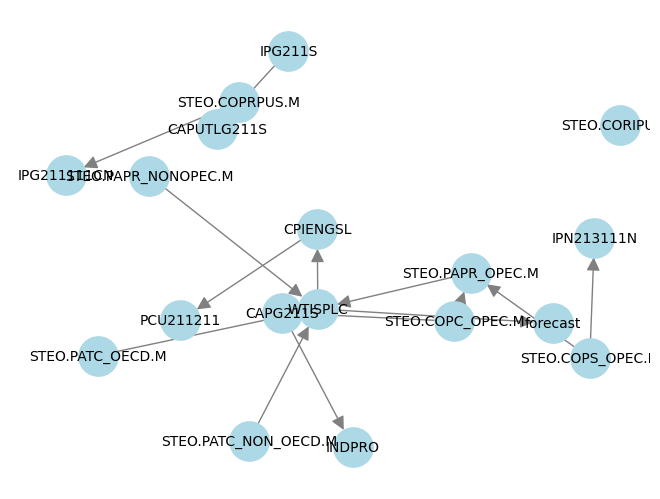

In [ ]:
val_prediction = best_model.predict(val_data_new);
val_prediction.index = val_data_new.index
# Retrieve it as an array so we can compare with real value
pred_val = val_prediction['forecast'].to_numpy();

print("\nPredicted Value Validation: ");
print(pred_val);
print("\nReal Value Validation: ");
print(val_real);

error = np.mean(val_real !=  pred_val);
#error = np.mean(vald_real != pred_value_vald);
print("\nError: ");
print(f"{round(error * 100,2)}%");
print("\nAccuracy: ");
print(f"{round((1-error) * 100,2)}%");

Plot_DAG(best_model)








### Testing Model Perfomance

In [ ]:
# DIscretizing the validation dataset:
discrete_test = pd.DataFrame(index = test_data[1:].index);
for series_id in datasets:
  path = "./" + series_id.replace(".", "_") + ".npz";
  if series_id == 'forecast':
    dhmm = hmms.DtHMM.from_file('./WTISPLC.npz');
  else:
    dhmm = hmms.DtHMM.from_file(path);
  data_diff = test_data[series_id].diff()[1:];
  emit_seq = np.array(data_diff.apply(lambda x: 1 if x > 0 else 0).values);
  ( log_prob, s_seq ) = dhmm.viterbi(emit_seq);
  discrete_test[series_id] = s_seq;
discrete_test.to_csv("./test_data.csv");

In [ ]:
# Using Testing dataset for Prediction:
discrete_test = pd.read_csv("./test_data.csv", index_col=0);
# Record real data observation, to be compared with the predicted one
test_real = discrete_test['forecast'].to_numpy();
# Drop the real data observation so that it does not bias prediction
test_data_new = discrete_test.drop('forecast', axis=1);
# Inference on the constructed graphical model
test_prediction = model.predict(test_data_new);
test_prediction.index = test_data_new.index
# Retrieve it as an array so we can compare with real value
pred_value_test = test_prediction['forecast'].to_numpy();

# Prediction Results:
print("\nPredicted Value: ");
# This is the price, not the forecast
print(pred_value_test);
print("\nReal Value: ");
print(test_real);
# Shift to get forecast
# error = np.mean(test_real != np.roll(pred_value_test, 1));
error = np.mean(test_real != pred_value_test); # Shift to get forecast
print("\nError: ");
print(error * 100, "%");
print("\nAccuracy: ");
print( (1-error) * 100, "%");

  0%|          | 0/33 [00:00<?, ?it/s]


Predicted Value: 
[2 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0]

Real Value: 
[2 2 0 0 1 1 1 2 0 0 1 1 2 0 1 2 0 0 0 0 1 1 1 2 0 0 1 1 1 1 2 0 1]

Error: 
36.36363636363637 %

Accuracy: 
63.63636363636363 %


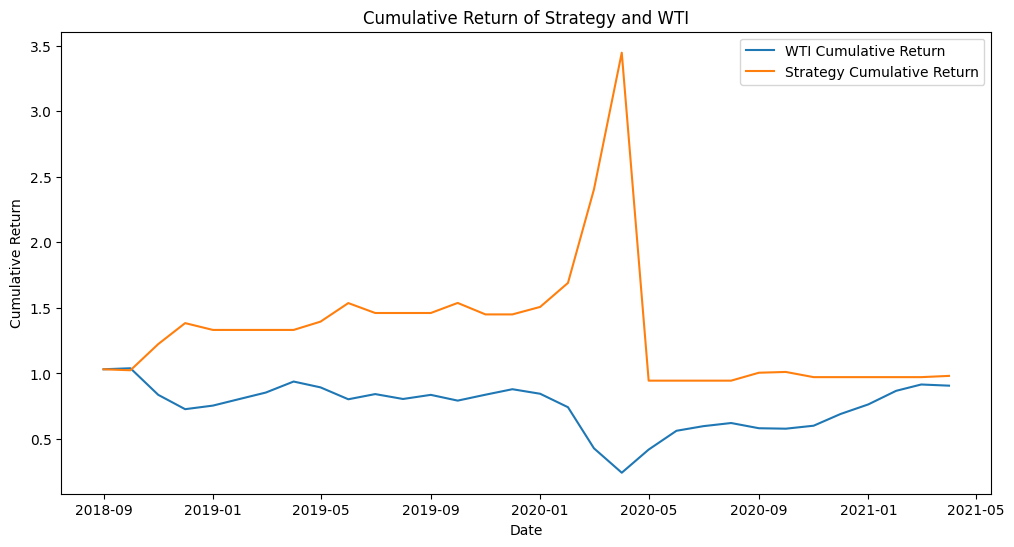

In [ ]:
test_price = pd.DataFrame(test_data['WTISPLC'], columns=['WTISPLC'])[1:];
test_signal = pd.DataFrame(test_prediction, columns=['forecast']);
test_signal.index = test_price.index

test_sheet = pd.concat([test_price, test_signal], axis=1, join='inner');
test_sheet['WTI_ret'] = test_sheet['WTISPLC'].pct_change();
test_sheet['Position'] = test_sheet.apply(lambda row : 1 if row['forecast'] == 2 else (-1 if row['forecast'] == 0 else 0), axis=1)
test_sheet['Strategy_ret'] = test_sheet['Position'].shift(1) * test_sheet['WTI_ret'];
test_sheet['WTI_Cumulative_ret'] = (1 + test_sheet['WTI_ret']).cumprod();
test_sheet['Strategy_CumRet'] = (1 + test_sheet['Strategy_ret']).cumprod();
test_sheet = test_sheet.dropna();
test_sheet.to_csv("./test_sheet.csv");

plt.figure(figsize=(12, 6))
plt.plot(test_sheet['WTI_Cumulative_ret'], label='WTI Cumulative Return')
plt.plot(test_sheet['Strategy_CumRet'], label='Strategy Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Strategy and WTI')
plt.legend()
plt.show()


In [ ]:
test_sheet

,WTISPLC,forecast,WTI_ret,Position,Strategy_ret,WTI_Cumulative_ret,Strategy_CumRet
2018-09-01,70.23,0,0.031884,-1,0.031884,1.031884,1.031884
2018-10-01,70.75,0,0.007404,-1,-0.007404,1.039524,1.024243
2018-11-01,56.96,0,-0.194912,-1,0.194912,0.836909,1.223880
2018-12-01,49.52,0,-0.130618,-1,0.130618,0.727593,1.383741
2019-01-01,51.38,1,0.037561,0,-0.037561,0.754922,1.331767
2019-02-01,54.95,1,0.069482,0,0.000000,0.807376,1.331767
2019-03-01,58.15,1,0.058235,0,0.000000,0.854393,1.331767
2019-04-01,63.86,0,0.098194,-1,0.000000,0.938290,1.331767
2019-05-01,60.83,0,-0.047448,-1,0.047448,0.893770,1.394956
2019-06-01,54.66,0,-0.101430,-1,0.101430,0.803115,1.536447


In [ ]:
# Calculate Sharpe Ratio
wti_sharpe_ratio = test_sheet['WTI_ret'].mean() / test_sheet['WTI_ret'].std() * np.sqrt(12)  # Assuming 12 month in a year
strategy_sharpe_ratio = test_sheet['Strategy_ret'].mean() / test_sheet['Strategy_ret'].std() * np.sqrt(12)

# print("WTI Test Sharpe Ratio:", round(wti_sharpe_ratio,2))
# print("Strategy Test Sharpe Ratio:", round(strategy_sharpe_ratio,2))
# print("WTI Test Cumulative Return:", round(test_sheet['WTI_Cumulative_ret'].iloc[-1],2))
# print("Strategy Test Cumulative Return:", round(test_sheet['Strategy_CumRet'].iloc[-1],2))

# Calculate Maximum Drawdown for WTI
wti_cumulative_returns = test_sheet['WTI_Cumulative_ret']
wti_peak = wti_cumulative_returns.cummax()
wti_drawdown = (wti_cumulative_returns - wti_peak) / wti_peak
wti_max_drawdown = wti_drawdown.min()

# Calculate Maximum Drawdown for Strategy
strategy_cumulative_returns = test_sheet['Strategy_CumRet']
strategy_peak = strategy_cumulative_returns.cummax()
strategy_drawdown = (strategy_cumulative_returns - strategy_peak) / strategy_peak
strategy_max_drawdown = strategy_drawdown.min()

# print("WTI Test Max Drawdown:", round(wti_max_drawdown, 2))
# print("Strategy Test Max Drawdown:", round(strategy_max_drawdown, 2))

result_df = pd.DataFrame({
    'Metric': ['Cumulative Return', 'Sharpe Ratio', 'Max Drawdown'],
    'WTI': [round(test_sheet['WTI_Cumulative_ret'].iloc[-1],2), round(wti_sharpe_ratio,2), round(wti_max_drawdown, 2)],
    'Strategy': [round(test_sheet['Strategy_CumRet'].iloc[-1],2), round(strategy_sharpe_ratio,2), round(strategy_max_drawdown, 2)]
})

display(result_df)


,Metric,WTI,Strategy
0,Cumulative Return,0.91,0.98
1,Sharpe Ratio,0.27,0.45
2,Max Drawdown,-0.77,-0.73


As depicted in the plot and the table above, our strategy outperform the buy and hold strategy in the test set by all three statistic which are final Cumulative return, Sharpe Ratio and Max Drawdown. The famous sharpe ratio is 67% higher than that of a buy and hold strategy while the Max drawdown and Cumulative return is slightly improved. This phenomenon could be credited to the super performance of our model from 2018 until the covid - 19 pandemic breakout in 2020 that caused WTI prices plunged to all time low.

## Step 6 - Contributions assessment

#### **1. Replacing EGARCH-M derived views with Bayesian Model for the Black-Litterman Model**

The paper mentioned the idea of replacing the GARCH based views with Bayesian in its introduction on page 2. However, it doesn't mention anything about how existing models use GARCH and how the existing models performance compare with the Bayesian derived views discussed in the paper. In addition, the paper also claims that factors such as macroeconomic, microeconomic and geopolitical factors play important role in determining price of crude oil. The existing GARCH based models do not incorporate these factors and is the only explanation why Bayesian derived views are better in forecasing oil price.

Hence, we think that this claim is invalid. The paper does not address the first problem that it was trying to address. The author needs to compare and prove that his model is better than existing models before making a claim that it can replace existing models. A hypothesis without proof is not convincing.

#### **2. Novel idea of using time-series data discretised by Hidden Markov Models as inputs to Belief Networks**

The paper discusses the use of HMM for regime detection and feed the discretised data into a Belief Network for training.

In 2017, Amayri, Ngo and Ploix uses HMM and Bayesian network to estimate occupancy in a room. HMM can be considered to be a special case of Bayesian network (Murphy and Mian). Hence, arguably HMM and Bayesian network are similar concepts.

There is indeed no other paper at the time of writing that does specifically what the paper did with time-series data, HMM and Belief Network.

We believe that the paper's claim of having a "novel" idea is valid. However, it's important to present this claim cautiously to avoid overstatement, as doing so could undermine credibility.

#### **3. Proposed working trading mechanism which is deployable and capable of independent decision making**

The paper mentions a simple trading algorithm in page 64. There is no explicit mentions of what the trading algorithm suppose to do other than a Python code implementation. There is also very limited back-testing and performance result discussion.

We think that the claim of "deployable" and "independent decision making" trading algorithm is overstated. Without any detailed back-testing and performance evaluation, a trading mechanism may look promising in theory but fall short of convincing others in practice.

#### **4. Novel idea of using time-series data discretised by Hidden Markove Models as inputs to Belief Networks**

This is a duplicate of point #2

Although human error is understandable, a mistake in a research paper will significantly hurt its credibility

#### **5. The level of abstraction for graphical models (provided by Python modules) allow better understanding of the design process**

The paper makes use of the several python modules, eia, fredapi, pgmpy, hmms, matplotlib, pylab and networkx. The paper demonstrates that these modules provide abstraction which allow readers to focus on their usage.

We think that the paper partially fulfills this claim. However, the paper claims that it provides level of abstraction, but there's quite a lot of raw for loops, data cleaning and manipulation that could have been abstracted away to allow better understanding of the design process.

Additionally, instead of providing raw code, it would have been better to provide pseudocode so that anyone who is not familiar with Python can understand how they are implemented


#### **6. The ability to forecast using systematic, event-driven, global macro strategy is capable of generating a higher return than funds based on high-frequency or fixed-income strategy**

We cannot find any mention or comparison of how the model is capable of generating higher return than funds based on high-frequency or fixed-income strategy.

Thus, we believe that this claim is invalid. It is important to provide proof or comparison analysis. Making unsubstantiated claims could undermine the research credibility.

#### **7. Construct better models of energy markets allowing policy makers to make better policy**

The author claims that the GARCH model doesn't take into account macroeconomic, microeconomic or geopolitical factors like the model in the paper. The Bayesian network model in the paper does incorporate these factors as input as discussed in Chapter 3 of the paper. However, similar to the issue raised in point 1, the paper does not provide comparison of the GARCH model and Bayesian network model and how they actually compare.

In addition, claiming that the seemingly better model can allow policy makers to draft more effective policy is unsubstantiated. Without any concrete suggestions or examples on how it can help, the claim is overly optimistic.

#### **8. Combine a multitude of existing research and experimentation in multiple disciplines and applying it in the commodity markets, in an effort of increasing alpha**

In chapter 2 of the paper, the paper discusses about the Bayesian belief networks, the markov chains and hidden markov models and how they are applicable in a number of discplines in discrete mathematics, such as graph theory. However, the paper does not mention how the research and experimentation in other disciplines make use of the models.

The paper also claims that it increases alpha in the quant community. Increasing alpha means the model was able to generate excess returns over an index. However, the paper does not support the claim with back-testing or other performance comparisons.

We believe that the paper partially fulfils the claim. However, additional evidence, such as detailed performance analysis and empirical validation, is necessary to fully justify the assertion. The claim can mislead the audience and cause loss of credibility.

## Step 7  - Discusssion

This research paper focuses on the challenging task of predicting crude oil prices, an importanmt component of the global economy due to oil's extensive use and significant influence over many economies. The study employs a novel approach, utilizing Hidden Markov Models (HMMs) to discretize time series data into its underlying market regimes. Following this, a Bayesian Network is constructed to model the relationships between the states of various economic indicators and then build a reasonable trading strategy based on the predicted future states of oil prices. Compared to other machine leanring method, we consider the method in this paper as follows:

Strengths Compared to Other Machine Learning Methods:

One of the biggest strengths of PGMs is their ability to clearly show the causal relationships between market variables. Unlike many machine learning models like neural networks, SVMs, or even boosting methods such as LightGBM and AdaBoost, which often act as "black boxes," PGMs help users understand what drives price changes. Bayesian Networks provide a clear picture of how different variables interact and affect each other, making the model's predictions easier to grasp and more reliable for traders and analysts. This is especially valuable in financial markets, where understanding the "why" behind predictions can be just as important as the predictions themselves.

PGMs are also naturally designed to handle uncertainty, which makes them a great fit for volatile markets like crude oil. They can make predictions even when some data is missing or noisy—a situation where many other models, including boosting methods, might struggle. This ability to manage uncertainty is a big plus, especially when dealing with imperfect data.

Weaknesses Compared to Other Machine Learning Methods:

Scalability is where PGMs might lag behind. Deep learning models and boosting methods are highly scalable and can efficiently process huge datasets. On the other hand, PGMs can become computationally demanding as the number of variables and data points grows, potentially slowing down large-scale applications.

In terms of prediction accuracy, particularly in highly nonlinear scenarios, PGMs might not match up to the performance of advanced models like deep learning or boosting methods. Techniques like LGBM and AdaBoost excel at combining multiple weak models to create a strong overall model, often outperforming simpler models, including PGMs, in terms of raw predictive power.

Lastly, while neural networks and boosting models typically need a lot of data to work effectively, they are often easier to implement and use. PGMs, however, might require significant domain expertise to set up correctly, especially when dealing with complex systems like financial markets.

In conclusion, our implementation of the author's method on recent data has yielded encouraging results, with the trading strategy outperforming the buy-and-hold approach. The strategy showed nearly double the Sharpe ratio, higher returns, and reduced maximum drawdown. However, these findings warrant cautious interpretation. The test period was short, and transaction fees and other associated costs were not considered, which could affect the overall performance.

More critically, our analysis of the DAG model revealed that the forecast price was primarily influenced by the current WTI price, suggesting that autocorrelation may be driving the results. To accurately assess whether the observed edge is genuinely due to the model or simply a result of autocorrelation in WTI returns, it is essential to control for this effect across the entire DAG model. Further investigation is needed to determine whether the model's predictive power extends beyond autocorrelation and provides a true advantage.



## Reference

Alvi, Danish A. Application of Probabilistic Graphical Models in Forecasting Crude Oil Price. 2018. University College London, Dissertation. https://arxiv.org/abs/1804.10869

Amayri, M., Q.-D. Ngo, E. A. E. Safadi, and S. Ploix. "Bayesian Network and Hidden Markov Model for Estimating Occupancy from Measurements and Knowledge." 2017 9th IEEE International Conference on Intelligent Data Acquisition and Advanced Computing Systems: Technology and Applications (IDAACS), vol. 2, IEEE, 2017, pp. 690-695, doi:10.1109/IDAACS.2017.8095179.

Bengio, Y. (2012). Practical recommendations for gradient-based training of deep architectures. arXiv preprint arXiv:1206.5533.

Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
Domingos, P. (2012). A few useful things to know about machine learning. Communications of the ACM, 55(10), 78-87.

Eiben, A. E., & Smith, J. E. (2015). Introduction to Evolutionary Computing. Springer.

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.

Kaufman, S., Rosset, S., & Perlich, C. (2012). Leakage in data mining: Formulation, detection, and avoidance. ACM Transactions on Knowledge Discovery from Data (TKDD), 6(4), 1-21.

Kingma, D. P., & Ba, J. (2015). Adam: A method for stochastic optimization. In Proceedings of the 3rd International Conference on Learning Representations (ICLR).

Murphy, K. P. (2012). Machine Learning: A Probabilistic Perspective. MIT Press.
Prechelt, L. (1998). Early stopping-but when?. In Neural Networks: Tricks of the Trade (pp. 55-69). Springer, Berlin, Heidelberg.

Murphy, Kevin, and Saira Mian. "Modelling Gene Expression Data Using Dynamic Bayesian Networks." Proceedings of the International Conference on Intelligent Systems for Molecular Biology (ISMB), 1999, pp. 1-10, www.cs.ubc.ca/~murphyk/Papers/ismb99.pdf.